# Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk


In [ ]:
# df = pd.read_csv(r"C:\Users\siagu\Downloads\binary-data - 50000 dataset.csv")
df = pd.read_csv(r"dataset_labelled.csv")

#df = df.head(500)
df

,body,target
0,My girlfriend and I started a webcomic about a...,0
1,"If you need a place to stay, a warm meal, or a...",0
2,"Ok, first of all, I have really bad anxiety an...",0
3,I read that straight girls like men with broad...,0
4,.. So I'm an almost 21 year old woman who is w...,1
...,...,...
192,Last night out of the blue a post gets out on ...,1
193,"Hello reddit nation, 16M here, sad story inbo...",1
194,So one of my favorite artists Janelle Monae ju...,0
195,"I wish to tell everyone, mainly family on Face...",0


In [ ]:
count=df['target'].value_counts()
count

0    119
1     78
Name: target, dtype: int64

In [ ]:
df.head()

,body,target
0,My girlfriend and I started a webcomic about a...,0
1,"If you need a place to stay, a warm meal, or a...",0
2,"Ok, first of all, I have really bad anxiety an...",0
3,I read that straight girls like men with broad...,0
4,.. So I'm an almost 21 year old woman who is w...,1


In [ ]:
df = df[['body', 'target']]

df.head()

,body,target
0,My girlfriend and I started a webcomic about a...,0
1,"If you need a place to stay, a warm meal, or a...",0
2,"Ok, first of all, I have really bad anxiety an...",0
3,I read that straight girls like men with broad...,0
4,.. So I'm an almost 21 year old woman who is w...,1


In [ ]:
df.shape

(197, 2)

# Data Analysis

In [ ]:
df.isnull().sum()

body      0
target    0
dtype: int64

# Data Preprocessing

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = nltk.PorterStemmer()

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n|\t', '', text)
    text = re.sub('\d', '', text) ##
    text = re.sub(r'[^\w\s]', ' ', text) ##
    text = [word for word in text.split() if word not in stopwords] 
    text = [stemmer.stem(word) for word in text]
    
    text = " ".join(text)
    
    return text
    

In [1]:
df['clean'] = df['body'].apply(preprocess)

NameError: ignored

In [ ]:
avg_len = df['body'].str.len().mean()
avg_word_count = df['body'].str.split().str.len().mean()

print('Original Tweets: ')
print(int(avg_len))
print(int(avg_word_count))


avg_clean_len = df['clean'].str.len().mean()
avg_clean_word_count = df['clean'].str.split().str.len().mean()

print('Preprocessed comments: ')
print(int(avg_clean_len))
print(int(avg_clean_word_count))


Original Tweets: 
1077
195
Preprocessed comments: 
531
88


Text(0.5, 1.0, 'Avg length of comments')

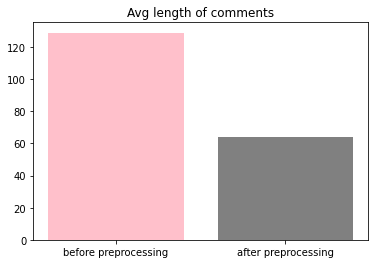

In [ ]:
y = [129, 64]
x  = ['before preprocessing', 'after preprocessing']

plt.bar(x, y, color = ['pink', 'gray'])
plt.title('Avg length of comments')

Text(0.5, 1.0, 'Avg word count of comments')

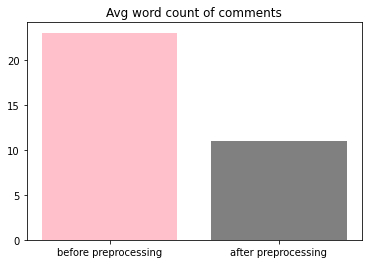

In [ ]:

y = [23, 11]
x  = ['before preprocessing', 'after preprocessing']

plt.bar(x, y, color = ['pink', 'gray'])
plt.title('Avg word count of comments')

In [ ]:
data = df[['clean']]

In [ ]:
data.head()

,clean
0,girlfriend start webcom relationship artist tr...
1,need place stay warm meal listen ear messag u ...
2,ok first realli bad anxieti tend focu person w...
3,read straight girl like men broad shoulder wid...
4,almost year old woman well lesbian area known ...


# Dataset splitting

In [ ]:
from sklearn.model_selection import train_test_split

#X1_train, X1_test, y1_train, y1_test = train_test_split(df['clean'], df['target'], test_size = 0.25, random_state = 0)
X1_train=df['clean'].head(149)
X1_test=df['clean'].tail(48)
y1_train=df['target'].head(149)
y1_test=df['target'].tail(48)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(149,)
(149,)
(48,)
(48,)


In [ ]:
#X2_train, X2_test, y2_train, y2_test = train_test_split(df['clean'], df['target'], test_size = 0.25, random_state = 0)
X2_train=df['clean'].head(149)
X2_test=df['clean'].tail(48)
y2_train=df['target'].head(149)
y2_test=df['target'].tail(48)
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)


(149,)
(149,)
(48,)
(48,)


# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, max_features = 659, analyzer = 'word', ngram_range=(1,1), stop_words='english')

X1_train = bow_vectorizer.fit_transform(X1_train)
X1_test = bow_vectorizer.transform(X1_test)

X1_train.shape

(149, 659)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df=2, max_features = 659, analyzer = 'word', ngram_range=(1,1), stop_words='english')

X2_train = tfidf_vectorizer.fit_transform(X2_train)
X2_test = tfidf_vectorizer.transform(X2_test)

X2_train.shape

(149, 659)

# Model Training

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
# from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# MLP

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

rf = MLPClassifier()
batch_size = np.arange(10,100,10)
learn_rate = np.arange(0.001,0.3)
#epochs = [10, 50, 100]
#param_grid = dict(batch_size=batch_size, learning_rate_init=learn_rate)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid1 = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=5)
grid_result = grid1.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid1.best_params_, grid1.best_score_))

The best parameters are {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'} with a score of 0.70


In [ ]:
#model1 = MLPClassifier(max_iter=500, activation='relu' ,batch_size=60, learning_rate_init=0.001)

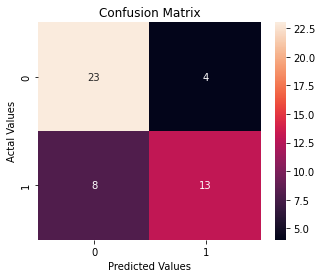

In [ ]:
#model1.fit(X1_train, y1_train)  

y1_pred = grid1.predict(X1_test)
#X1_test
cm = confusion_matrix(y1_test, y1_pred)
#d1 = pd.concat([X1_test,y1_test], axis=1)
#d1 = pd.concat([d1,y1_pred], axis=1)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)

In [ ]:
print(y1_pred)

[1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 1]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.76      0.62      0.68        21

    accuracy                           0.75        48
   macro avg       0.75      0.74      0.74        48
weighted avg       0.75      0.75      0.75        48



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

#from utils.plot_ROC_Curve import plot_roc_pr

#plot_roc_pr(y_pred = y1_pred, y_test = y1_test)


In [ ]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


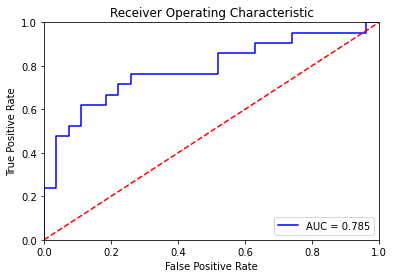

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid1.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#!pip install ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.684 auc=0.786


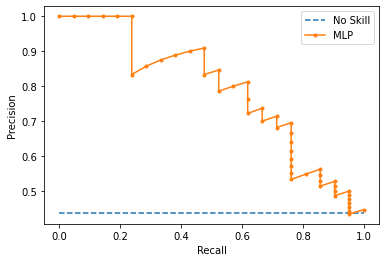

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid1.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid1.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='MLP')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.7354497354497355


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


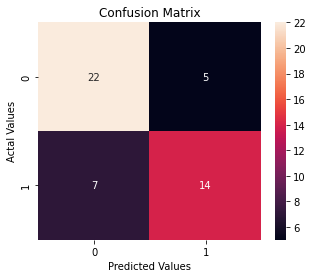

In [ ]:
grid1.fit(X2_train, y2_train)


y2_pred = grid1.predict(X2_test)
#grid1.fit(X2_train, y2_train)

y2_pred = grid1.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)

#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(y2_pred)

[1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 1 0 1]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.74      0.67      0.70        21

    accuracy                           0.75        48
   macro avg       0.75      0.74      0.74        48
weighted avg       0.75      0.75      0.75        48



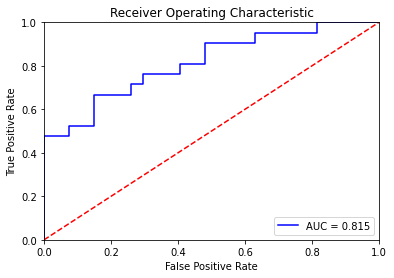

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid1.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.700 auc=0.820


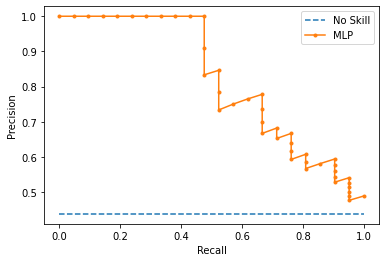

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid1.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid1.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='MLP')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.7407407407407407


# Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
#n_depth_range = np.arange(1,32)
min_samples_split=np.arange(0.1,1.0)
criterion=['gini', 'entropy', 'log_loss']
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range,min_samples_split=min_samples_split,criterion=criterion)

rf = RandomForestClassifier()

grid2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid2.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.3f"
      % (grid2.best_params_, grid2.best_score_))

The best parameters are {'criterion': 'gini', 'max_features': 3, 'min_samples_split': 0.1, 'n_estimators': 10} with a score of 0.725


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

In [ ]:
#model2 = RandomForestClassifier(n_estimators=50, max_features=5)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

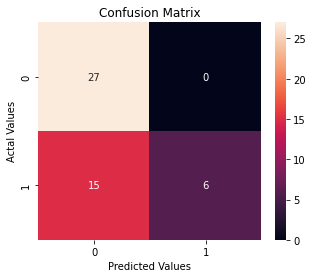

In [ ]:
grid2.fit(X1_train, y1_train)  

y1_pred = grid2.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)


In [ ]:
print(y1_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        27
           1       1.00      0.29      0.44        21

    accuracy                           0.69        48
   macro avg       0.82      0.64      0.61        48
weighted avg       0.80      0.69      0.63        48



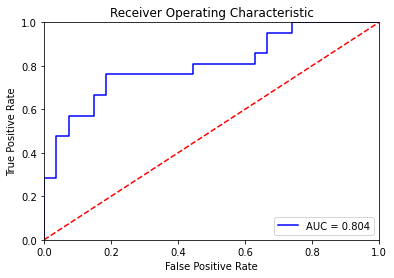

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid2.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.444 auc=0.804


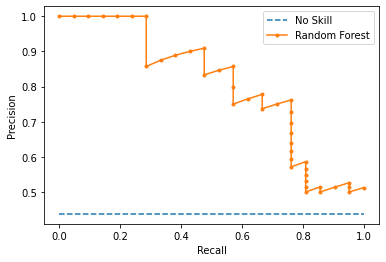

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid2.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid2.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.6428571428571428


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

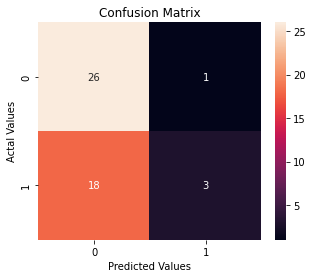

In [ ]:
grid2.fit(X2_train, y2_train)

y2_pred = grid2.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(y2_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73        27
           1       0.75      0.14      0.24        21

    accuracy                           0.60        48
   macro avg       0.67      0.55      0.49        48
weighted avg       0.66      0.60      0.52        48



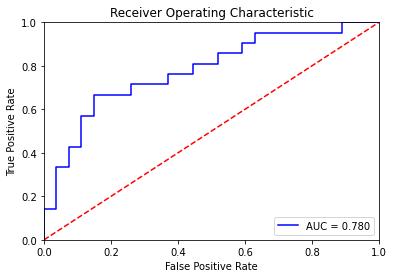

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid2.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.240 auc=0.748


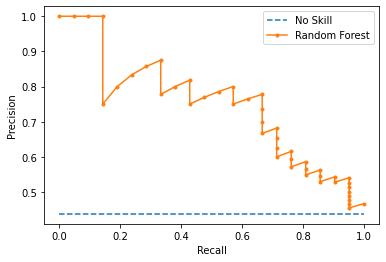

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid2.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid2.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.5529100529100529


# Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
max_depth_range = np.arange(1,32)
criterion=['gini', 'entropy', 'log_loss']
min_samples_split=np.arange(0.1,1.0)
param_grid = dict(max_features=max_features_range, max_depth=max_depth_range,criterion=criterion,min_samples_split=min_samples_split)

rf = DecisionTreeClassifier()

grid3 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid3.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid3.best_params_, grid3.best_score_))

The best parameters are {'criterion': 'gini', 'max_depth': 29, 'max_features': 1, 'min_samples_split': 0.1} with a score of 0.68


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
775 fits failed out of a total of 2325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
775 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFa

In [ ]:
#model3 = DecisionTreeClassifier(max_depth=4, max_features=3) 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
775 fits failed out of a total of 2325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
775 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFa

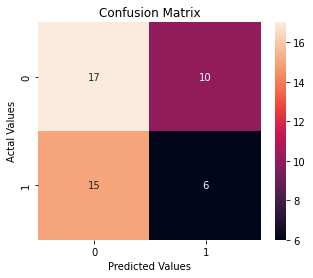

In [ ]:
grid3.fit(X1_train, y1_train)  

y1_pred = grid3.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(y1_pred)

[0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.53      0.63      0.58        27
           1       0.38      0.29      0.32        21

    accuracy                           0.48        48
   macro avg       0.45      0.46      0.45        48
weighted avg       0.46      0.48      0.47        48



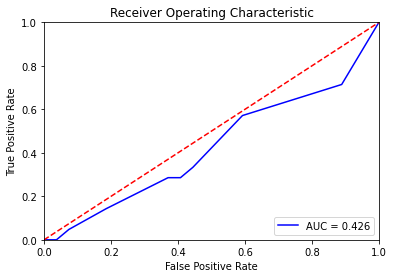

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid3.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.324 auc=0.383


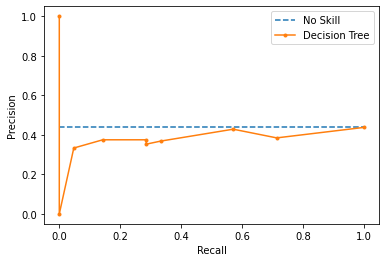

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid3.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid3.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.4576719576719577


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
775 fits failed out of a total of 2325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
775 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFa

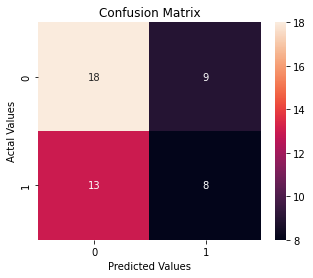

In [ ]:
grid3.fit(X2_train, y2_train)

y2_pred = grid3.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(y2_pred)

[0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 0 0 1 0 0 0 0]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62        27
           1       0.47      0.38      0.42        21

    accuracy                           0.54        48
   macro avg       0.53      0.52      0.52        48
weighted avg       0.53      0.54      0.53        48



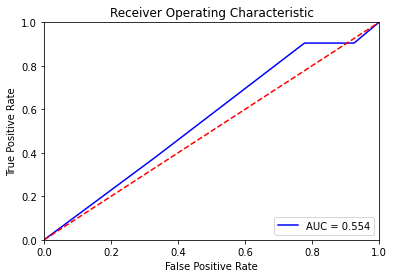

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid3.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.421 auc=0.569


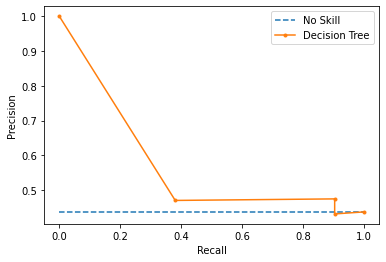

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid3.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid3.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.5238095238095237


# SVM

In [ ]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1000], 
              'gamma': [1, 0.1, 0.0001],
               'kernel': ['linear','rbf'],
                'class_weight':['balanced', None]} 
rf=SVC(probability=True)
grid4 = GridSearchCV(estimator=rf, param_grid=param_grid, refit = True, verbose = 3, cv=5)
  
# fitting the model for grid search
grid4.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid4.best_params_, grid4.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.600 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.633 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.552 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=

In [ ]:
#model4 = SVC(C=10,gamma=0.1, max_iter=4000)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.600 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.633 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.552 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=

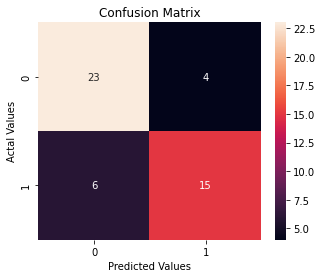

In [ ]:
grid4.fit(X1_train, y1_train)  

y1_pred = grid4.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#print(cm)


In [ ]:
print(y1_pred)

[0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 1]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.79      0.71      0.75        21

    accuracy                           0.79        48
   macro avg       0.79      0.78      0.79        48
weighted avg       0.79      0.79      0.79        48



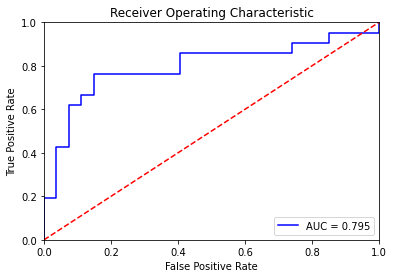

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid4.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.750 auc=0.794


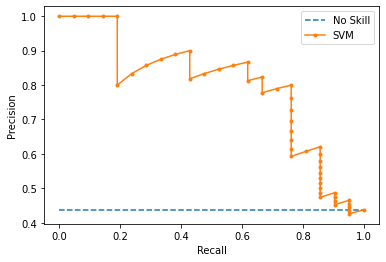

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid4.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values

yhat = grid4.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.783068783068783


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.633 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.633 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.600 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.621 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=

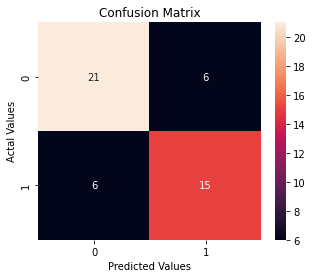

In [ ]:
grid4.fit(X2_train, y2_train)

y2_pred = grid4.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(y2_pred)

[0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 1 0 1]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.71      0.71      0.71        21

    accuracy                           0.75        48
   macro avg       0.75      0.75      0.75        48
weighted avg       0.75      0.75      0.75        48



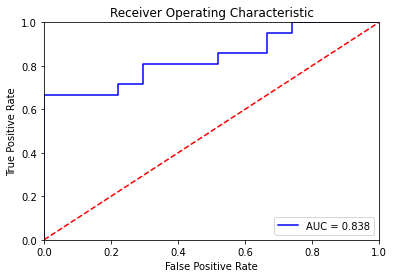

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid4.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

Model1: f1=0.421 auc=0.863


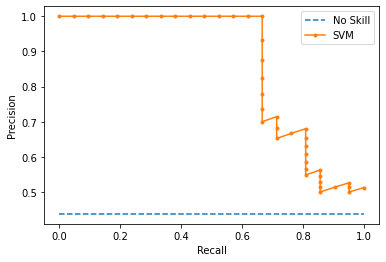

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid4.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid3.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.746031746031746


In [ ]:
data = pd.read_csv(r"dataset_timeline1.csv")
data.shape

(12074, 3)

In [ ]:
data.iloc[12073, :]

subreddit                                                 lgbt
body         I've posted in the past for advice about comin...
target                                                     NaN
Name: 12073, dtype: object

In [ ]:
for i in range(12074):
    text = preprocess(data['body'][i])
    
    text = tfidf_vectorizer.transform([text])
    
    value = grid4.predict(text)
    
    data.iloc[i, -1] = value

In [ ]:
data.head()

,subreddit,body,target
0,lgbt,Finally my first binder came in today and I'm ...,1.0
1,lgbt,Ok so growing up I've always loved girls no ma...,0.0
2,lgbt,"Hey, all! I wanted to make a help video on how...",0.0
3,lgbt,"I personally never have done it before,And I w...",0.0
4,lgbt,"Hello, I'm a Public Safety Officer at a relati...",1.0


In [ ]:
data.tail()

,subreddit,body,target
12069,lgbt,I know this mightn't be the right subreddit to...,0.0
12070,lgbt,So last night i was riding an elevator and a t...,1.0
12071,lgbt,They keep referencing how depressed they are t...,0.0
12072,lgbt,"New, secret account for obvious reasons. Sorry...",1.0
12073,lgbt,I've posted in the past for advice about comin...,1.0


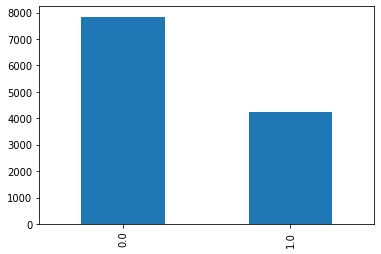

In [ ]:
count=data['target'].value_counts()
count.plot(kind='bar')

In [ ]:
count

0.0    7837
1.0    4237
Name: target, dtype: int64

In [ ]:
data.to_csv('dataset_svm.csv')

In [ ]:
data1 = pd.read_csv(r"dataset_timeline1.csv")
data1.shape

(12074, 3)

In [ ]:
for i in range(12074):
    text = preprocess(data1['body'][i])
    
    text = bow_vectorizer.transform([text])
    
    value = grid1.predict(text)
    
    data1.iloc[i, -1] = value

In [ ]:
data1.to_csv('dataset_mlp.csv')

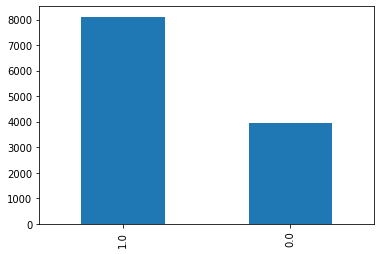

In [ ]:
count=data1['target'].value_counts()
count.plot(kind='bar')

In [ ]:
count

1.0    8107
0.0    3967
Name: target, dtype: int64

In [ ]:
data2 = pd.read_csv(r"dataset_timeline1.csv")
data2.shape

(12074, 3)

In [ ]:
for i in range(12074):
    text = preprocess(data1['body'][i])
    
    text = tfidf_vectorizer.transform([text])
    
    value = grid1.predict(text)
    
    data1.iloc[i, -1] = value

In [ ]:
data2.to_csv('dataset_mlp.csv')

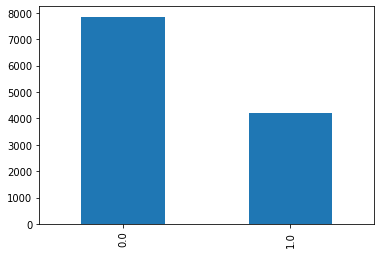

In [ ]:
count=data1['target'].value_counts()
count.plot(kind='bar')

In [ ]:
count

0.0    7857
1.0    4217
Name: target, dtype: int64